I am following the tutorial ifficial [site](https://cole-trapnell-lab.github.io/monocle3/docs/getting_started/)

In [2]:
library(monocle3)
library(dplyr)
library(ggplot2)

# Load the data

In [125]:
library(Matrix)

# Load matrix and metadata
expression_matrix <- readMM("/sharedFolder/Data/expression_23days/matrix.mtx.gz")
gene_annotation <- readLines("/sharedFolder/Data/expression_23days/features.tsv.gz") %>% as.data.frame()
colnames(gene_annotation) <- "gene_short_name"
rownames(gene_annotation) <- readLines("/sharedFolder/Data/expression_23days/features.tsv.gz")
cell_metadata <- readLines("/sharedFolder/Data/expression_23days/barcodes.tsv.gz") %>% as.data.frame()
# colnames(cell_metadata) <- "Size_Factor"
rownames(cell_metadata) <- readLines("/sharedFolder/Data/expression_23days/barcodes.tsv.gz")

In [126]:
# cds <- new_cell_data_set(expression_matrix,
#                          cell_metadata = cell_metadata,
#                          gene_metadata = gene_annotation)

In [127]:
head(cell_metadata)

,.
,<chr>
1_AAACGAACACGTGAGA-1_1_23d,1_AAACGAACACGTGAGA-1_1_23d
1_AAACGAAGTCGAAACG-1_1_23d,1_AAACGAAGTCGAAACG-1_1_23d
1_AAACGAAGTGGCAGAT-1_1_23d,1_AAACGAAGTGGCAGAT-1_1_23d
1_AAACGAAGTGGTTCTA-1_1_23d,1_AAACGAAGTGGTTCTA-1_1_23d
1_AAACGAAGTTGGCCGT-1_1_23d,1_AAACGAAGTTGGCCGT-1_1_23d
1_AAACGAATCCTTCACG-1_1_23d,1_AAACGAATCCTTCACG-1_1_23d


In [128]:
head(gene_annotation)

,gene_short_name
,<chr>
RP11-34P13.3,RP11-34P13.3
FAM138A,FAM138A
OR4F5,OR4F5
RP11-34P13.7,RP11-34P13.7
RP11-34P13.8,RP11-34P13.8
RP11-34P13.14,RP11-34P13.14


In [168]:
cds_start <- new_cell_data_set(as(expression_matrix, "sparseMatrix"),
cell_metadata = cell_metadata,
gene_metadata = gene_annotation)

In [130]:
head(cds2)

class: cell_data_set 
dim: 6 29736 
metadata(1): cds_version
assays(1): counts
rownames: NULL
rowData names(1): gene_short_name
colnames(29736): 1_AAACGAACACGTGAGA-1_1_23d 1_AAACGAAGTCGAAACG-1_1_23d
  ... 3_TTTGTTGAGAGAAGGT-1_2_23d 3_TTTGTTGTCCATGAGT-1_2_23d
colData names(1): Size_Factor
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

# Clustering

## Preprocess the data

In [131]:
cds <- preprocess_cds(cds_start, num_dim = 100)

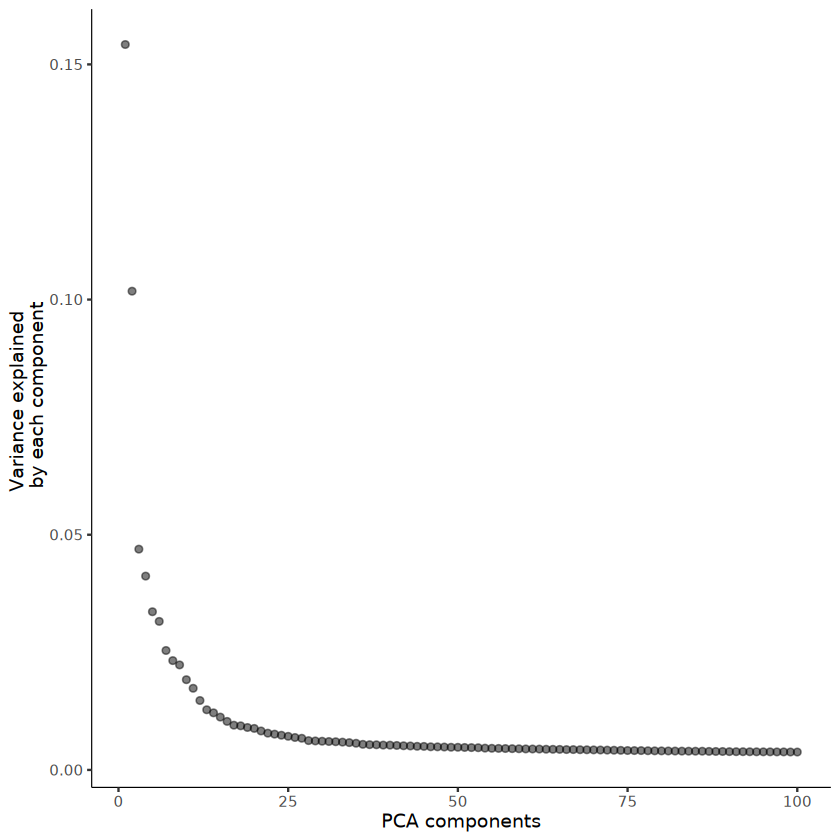

In [132]:
plot_pc_variance_explained(cds)

## Dimensionality reduction

In [133]:
cds <- reduce_dimension(cds)

No preprocess_method specified, using preprocess_method = 'PCA'



No trajectory to plot. Has learn_graph() been called yet?

cluster not found in colData(cds), cells will not be colored

cluster_cells() has not been called yet, can't color cells by cluster



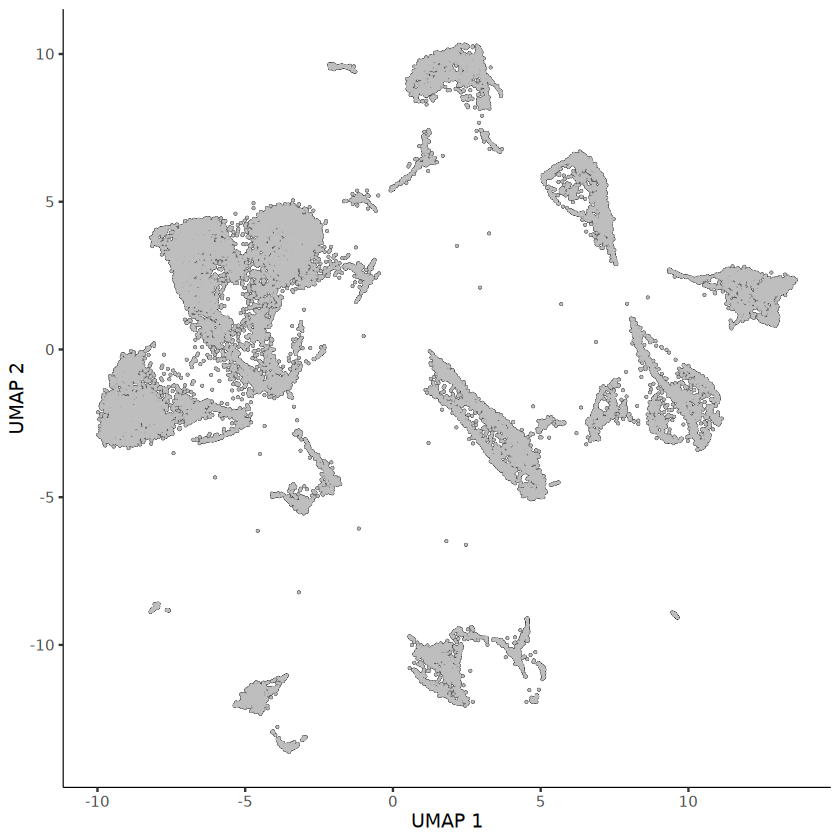

In [134]:
plot_cells(cds)

No trajectory to plot. Has learn_graph() been called yet?

partition not found in colData(cds), cells will not be colored

cluster_cells() has not been called yet, can't color cells by cluster



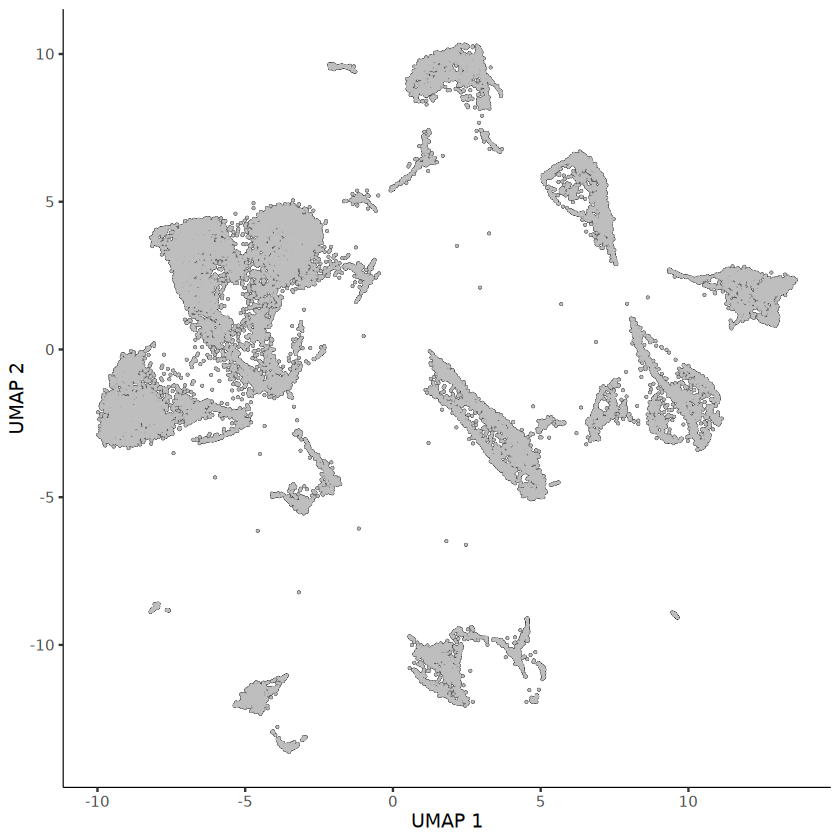

In [135]:
plot_cells(cds, color_cells_by="partition")

No trajectory to plot. Has learn_graph() been called yet?



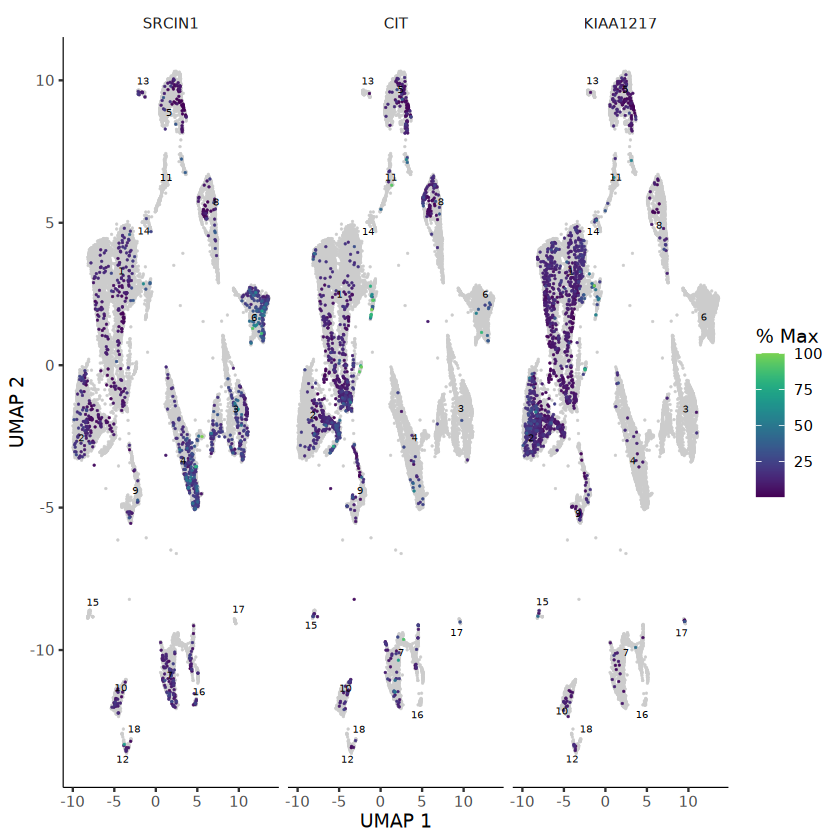

In [156]:
plot_cells(cds, genes=c("SRCIN1", "CIT", "KIAA1217"))

No trajectory to plot. Has learn_graph() been called yet?



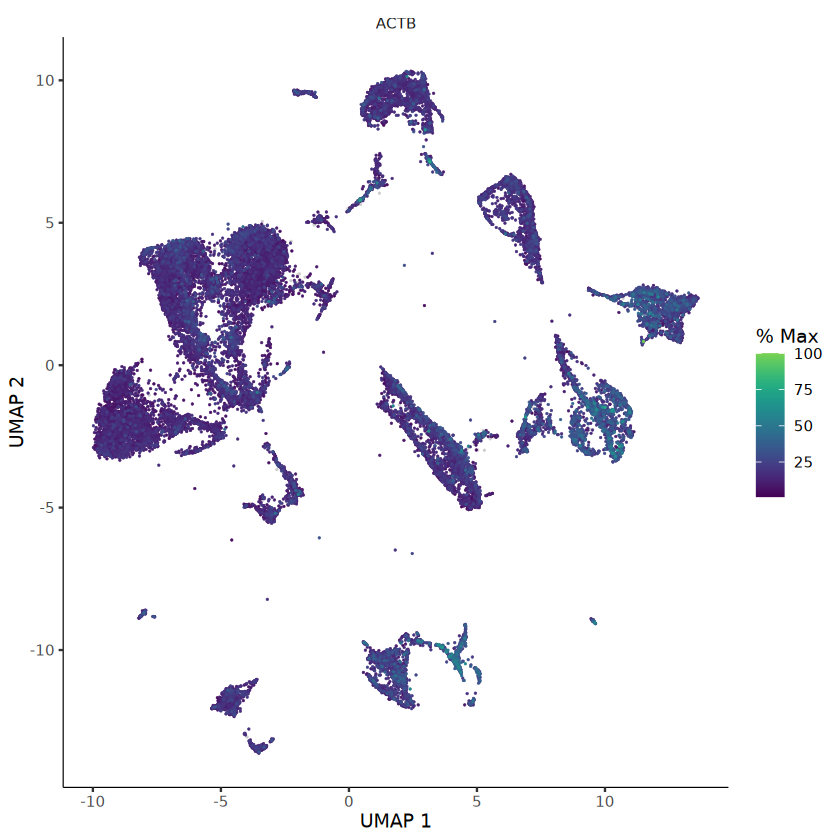

In [137]:
plot_cells(cds, genes=c("ACTB"))

## Group cells into clusters

No trajectory to plot. Has learn_graph() been called yet?



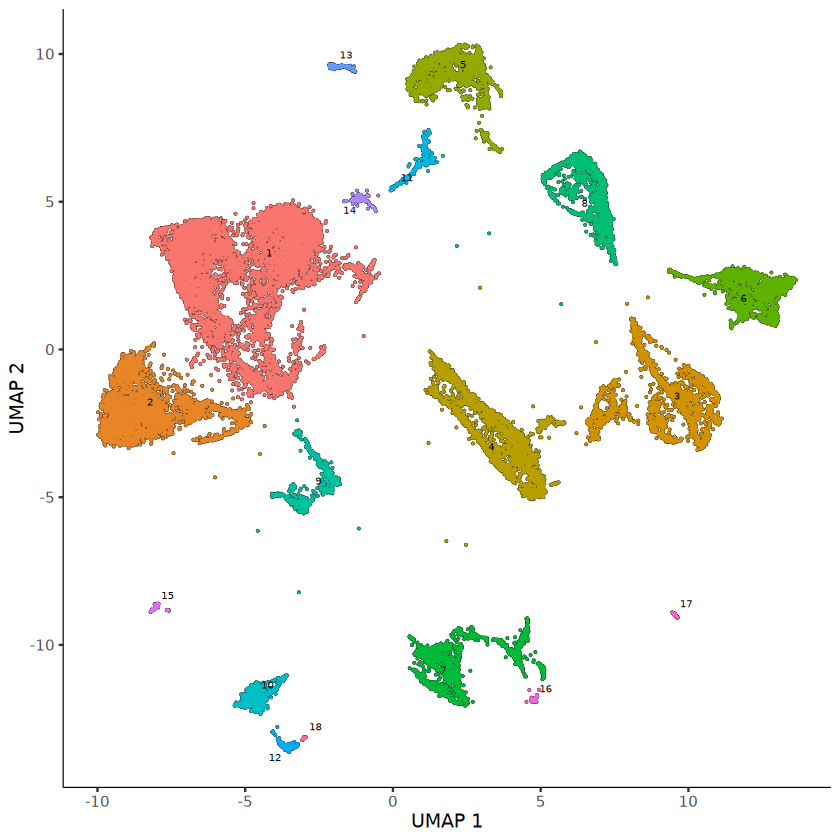

In [138]:
cds <- cluster_cells(cds, resolution=1e-5)
plot_cells(cds)

In [139]:
cds_a <- cluster_cells(cds, resolution=1e-6)
table(clusters(cds_a))


    1     2     3     4     5     6     7     8     9    10    11    12    13 
13078  2888  2766  2250  2169  2090  2051   840   784   220   212   168   115 
   14    15 
   81    24 

No trajectory to plot. Has learn_graph() been called yet?



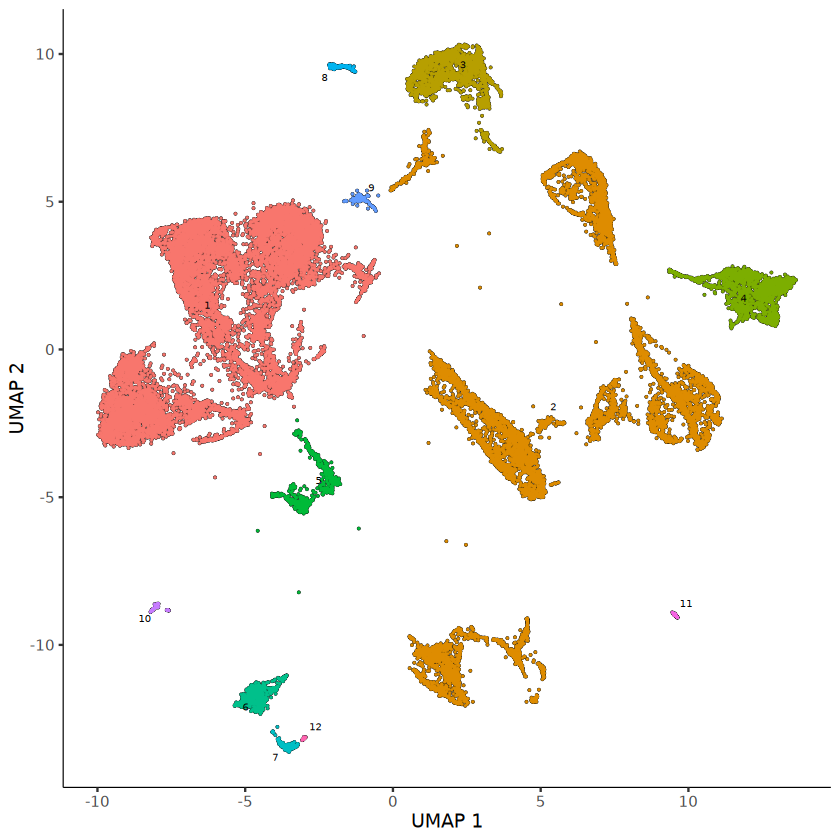

In [140]:
plot_cells(cds, color_cells_by="partition", group_cells_by="partition")

## Find marker genes expressed by each cluster

In [149]:
marker_test_res <- top_markers(cds, group_cells_by="cluster", 
                               reference_cells=1000, cores=8)

  |===================================================        |  86%, ETA 00:00

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  |=======================================================| 100%, Elapsed 00:11


In [150]:
head(marker_test_res)

,gene_id,gene_short_name,cell_group,marker_score,mean_expression,fraction_expressing,specificity,pseudo_R2,marker_test_p_value,marker_test_q_value
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,HES4,HES4,1,0.1220258,4.3283759,0.9408738,0.1296941,0.1040420,1.416666e-127,8.591969e-122
2,HES4,HES4,9,0.1667098,6.4412072,0.9488095,0.1757042,0.1944149,7.679580e-101,4.657604e-95
3,HES5,HES5,8,0.2399326,3.6471991,0.8711180,0.2754306,0.3405845,1.004250e-254,6.090695e-249
4,PDPN,PDPN,8,0.1571629,0.4521627,0.4482402,0.3506221,0.1764891,9.330497e-132,5.658872e-126
5,CAMK2N1,CAMK2N1,4,0.1977402,4.2984816,0.7895879,0.2504347,0.1879250,2.220708e-160,1.346841e-154
6,CAMK2N1,CAMK2N1,6,0.1952709,3.9986338,0.8235007,0.2371229,0.2250182,7.441087e-172,4.512960e-166


In [163]:
"CIT" %in% marker_test_res$gene_id

[1] FALSE

In [151]:
top_specific_markers <- marker_test_res %>%
                            filter(fraction_expressing >= 0.10) %>%
                            group_by(cell_group) %>%
                            top_n(1, pseudo_R2)

top_specific_marker_ids <- unique(top_specific_markers %>% pull(gene_id))

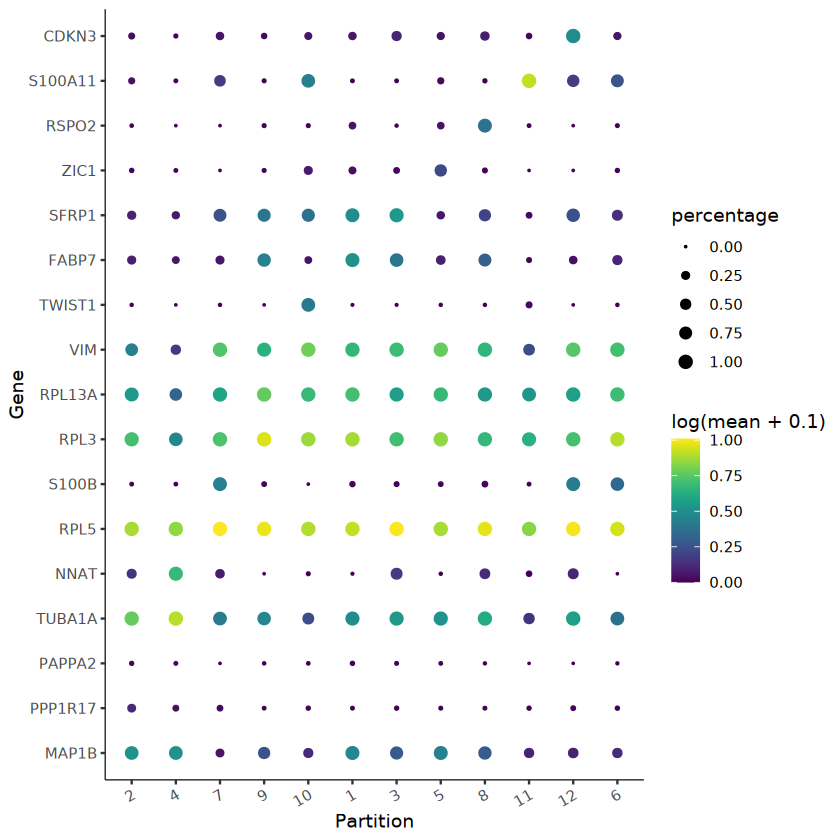

In [152]:
plot_genes_by_group(cds,
                    top_specific_marker_ids,
                    group_cells_by="partition",
                    ordering_type="maximal_on_diag",
                    max.size=3)

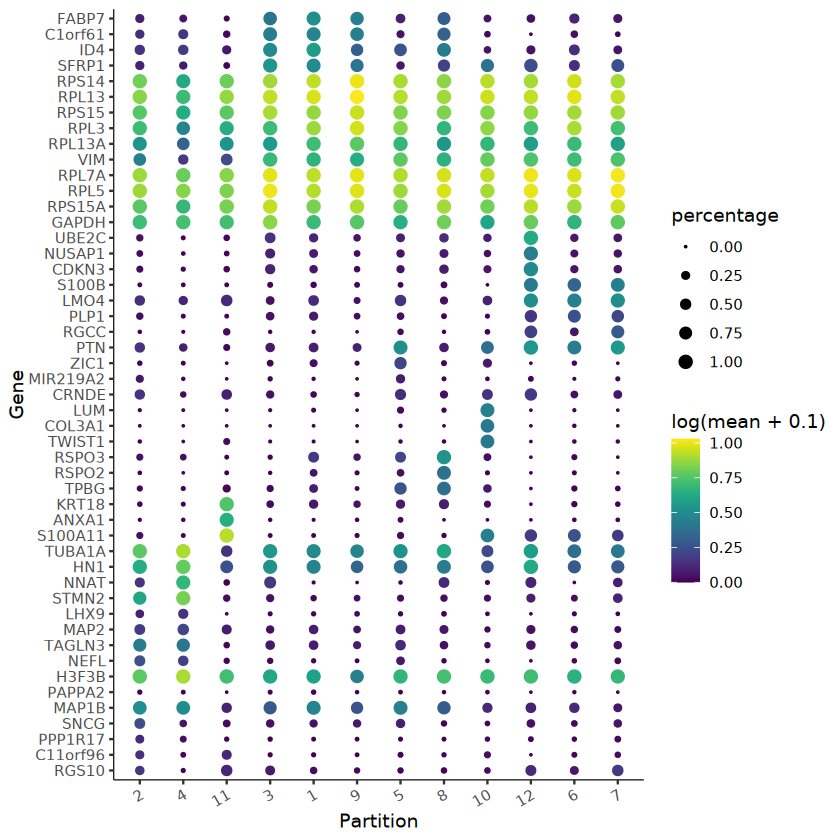

In [153]:
top_specific_markers <- marker_test_res %>%
                            filter(fraction_expressing >= 0.10) %>%
                            group_by(cell_group) %>%
                            top_n(3, pseudo_R2)

top_specific_marker_ids <- unique(top_specific_markers %>% pull(gene_id))

plot_genes_by_group(cds,
                    top_specific_marker_ids,
                    group_cells_by="partition",
                    ordering_type="cluster_row_col",
                    max.size=3)

## Annotate the cells

In [154]:
colData(cds)$assigned_cell_type <- as.character(partitions(cds))

In [155]:
colData(cds)

DataFrame with 29736 rows and 3 columns
                                                . Size_Factor
                                      <character>   <numeric>
1_AAACGAACACGTGAGA-1_1_23d 1_AAACGAACACGTGAGA-1..    0.799704
1_AAACGAAGTCGAAACG-1_1_23d 1_AAACGAAGTCGAAACG-1..    1.972202
1_AAACGAAGTGGCAGAT-1_1_23d 1_AAACGAAGTGGCAGAT-1..    1.365553
1_AAACGAAGTGGTTCTA-1_1_23d 1_AAACGAAGTGGTTCTA-1..    0.744730
1_AAACGAAGTTGGCCGT-1_1_23d 1_AAACGAAGTTGGCCGT-1..    0.388471
...                                           ...         ...
3_TTTGGTTTCGGAATGG-1_2_23d 3_TTTGGTTTCGGAATGG-1..    0.391906
3_TTTGGTTTCGGTTAGT-1_2_23d 3_TTTGGTTTCGGTTAGT-1..    2.998675
3_TTTGTTGAGACCATAA-1_2_23d 3_TTTGTTGAGACCATAA-1..    0.788108
3_TTTGTTGAGAGAAGGT-1_2_23d 3_TTTGTTGAGAGAAGGT-1..    0.797342
3_TTTGTTGTCCATGAGT-1_2_23d 3_TTTGTTGTCCATGAGT-1..    1.200200
                           assigned_cell_type
                                  <character>
1_AAACGAACACGTGAGA-1_1_23d                  2
1_AAACGAAGTCGAAA

In [164]:
## Install the monocle3 branch of garnett
BiocManager::install(c("org.Mm.eg.db", "org.Hs.eg.db"))
devtools::install_github("cole-trapnell-lab/garnett", ref="monocle3")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cloud.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.26), R 4.3.3 (2024-02-29)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'org.Hs.eg.db'”
Installing package(s) 'org.Mm.eg.db'

Old packages: 'anytime', 'data.table', 'dendextend', 'emmeans', 'ggfun',
  'glmnet', 'heatmaply', 'httr2', 'matrixStats', 'purrr', 'rprojroot',
  'spatstat.univar', 'spatstat.utils', 'waldo'




monocle3 (ceadb884a... -> 4f4239a0a...) [GitHub]
rly      (NA           -> 1.7.4       ) [CRAN]
glmnet   (4.1-9        -> 4.1-10      ) [CRAN]


Skipping 6 packages not available: org.Mm.eg.db, org.Hs.eg.db, DelayedMatrixStats, DelayedArray, Biobase, AnnotationDbi

Installing 2 packages: rly, glmnet

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




BPCells      (NA     -> 9d2a036af...) [GitHub]
speedglm     (0.3-5  -> ca34b4e53...) [GitHub]
matrixStats  (1.1.0  -> 1.5.0       ) [CRAN]
purrr        (1.0.4  -> 1.1.0       ) [CRAN]
data.table   (1.17.6 -> 1.17.8      ) [CRAN]
distribut... (NA     -> 0.5.0       ) [CRAN]
ggdist       (NA     -> 3.3.3       ) [CRAN]


purrr (1.0.4 -> 1.1.0) [CRAN]


Installing 1 packages: purrr

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/tmp/Rtmplq7bBi/remotes1d81682bda3/bnprks-BPCells-9d2a036/r/DESCRIPTION’ (456ms)
─  preparing ‘BPCells’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  running ‘cleanup’
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘BPCells_0.3.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping 29 packages ahead of CRAN: S4Arrays, IRanges, S4Vectors, MatrixGenerics, BiocGenerics, GenomeInfoDbData, zlibbioc, XVector, GenomeInfoDb, Rhdf5lib, rhdf5filters, DelayedArray, Biobase, sparseMatrixStats, beachmat, DelayedMatrixStats, SummarizedExperiment, GenomicRanges, BiocParallel, SingleCellExperiment, ScaledMatrix, rhdf5, ResidualMatrix, scuttle, BiocSingular, BiocNeighbors, limma, HDF5Array, batchelor

Installing 5 packages: matrixStats, purrr, data.table, distributional, ggdist

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'BPCells' from a github remote, the SHA1 (9d2a036a) has not changed since last install.
  Use `force = TRUE` to force installation




── R CMD build ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/tmp/Rtmplq7bBi/remotes1d858197172/cole-trapnell-lab-speedglm-ca34b4e/DESCRIPTION’ (457ms)
─  preparing ‘speedglm’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘speedglm_0.3-4.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/tmp/Rtmplq7bBi/remotes1d8710176df/cole-trapnell-lab-monocle3-4f4239a/DESCRIPTION’ (436ms)
─  preparing ‘monocle3’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  excluding invalid files
   Subdirectory 'R' contains invalid file names:
     ‘bpcells.R.0’
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘monocle3_1.4.26.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/tmp/Rtmplq7bBi/remotes1d8150ff0c5/cole-trapnell-lab-garnett-349c1f8/DESCRIPTION’ (467ms)
─  preparing ‘garnett’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘garnett_0.2.22.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Constructiong Single Cell trajectories

In [165]:
## preprocessing

In [170]:
cds <- preprocess_cds(cds_start, num_dim = 50)
cds <- align_cds(cds, alignment_group = "batch", residual_model_formula_str = "~ bg.300.loading + bg.400.loading + bg.500.1.loading + bg.500.2.loading + bg.r17.loading + bg.b01.loading + bg.b02.loading")

ERROR: Error in eval(predvars, data, env): object 'bg.300.loading' not found


In [ ]:
print("ok")